In [1]:
import keras

base_model = keras.applications.EfficientNetB0(include_top=False)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
from keras.utils import image_dataset_from_directory

In [4]:
train_ds, val_ds = image_dataset_from_directory(
    "C:/images", image_size=(224, 224),
    validation_split=0.2, subset='both', seed=42
    )

Found 2148 files belonging to 2 classes.
Using 1719 files for training.
Using 429 files for validation.


In [7]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
base_model.trainable=False # 기존 학습된 커널의 가중치를 변경하지 않음

In [6]:
inputs = keras.layers.Input(shape=(224, 224, 3))
x = base_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

In [8]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

hist = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 725ms/step - accuracy: 0.8659 - loss: 0.3364 - val_accuracy: 0.9650 - val_loss: 0.1003
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 658ms/step - accuracy: 0.9755 - loss: 0.0965 - val_accuracy: 0.9720 - val_loss: 0.0891
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 665ms/step - accuracy: 0.9784 - loss: 0.0662 - val_accuracy: 0.9697 - val_loss: 0.0913
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 666ms/step - accuracy: 0.9815 - loss: 0.0533 - val_accuracy: 0.9837 - val_loss: 0.0580
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 677ms/step - accuracy: 0.9892 - loss: 0.0401 - val_accuracy: 0.9790 - val_loss: 0.0542
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 654ms/step - accuracy: 0.9955 - loss: 0.0257 - val_accuracy: 0.9814 - val_loss: 0.0500
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 654ms/step - accuracy: 0.9862 - loss: 0.0336 - val_accuracy: 0.9837 - val_loss: 0.0529
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 656ms/step - accuracy: 0.9963 - loss: 0.0211 - val_accu

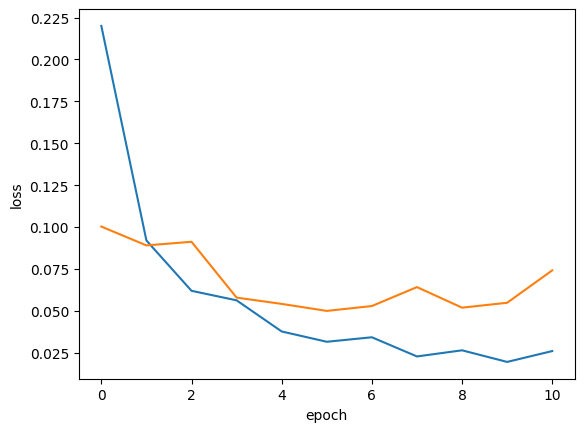

In [10]:
# !pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend
plt.show()

In [12]:
model2 = keras.models.load_model("best-model.keras")

In [13]:
model2.evaluate(val_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 530ms/step - accuracy: 0.9830 - loss: 0.0476


[0.05002857372164726, 0.9813519716262817]

In [15]:
import numpy as np
from PIL import Image

img = Image.open("c:/images/Siirt_Pistachio/siirt 230.jpg")
img = np.array(img.resize((224, 224)))
img.shape

(224, 224, 3)

In [16]:
img = img[np.newaxis,:]
img.shape

(1, 224, 224, 3)

In [17]:
model2.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.9195399]], dtype=float32)